In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.executing_eagerly()

2.19.0


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist, boston_housing, imdb
from tensorflow.keras.utils import to_categorical
import keras
from keras.utils import plot_model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import cv2
from google.colab.patches import cv2_imshow

import re
import nltk
# nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Disabled eager execution

In [ ]:
tf.compat.v1.disable_eager_execution()

scalar=tf.constant(1, tf.int16, name='scalar') # rank or dimensions 0
vector=tf.constant([1,2,3], tf.int64,name='vecctor') #rank or dimensions 1
mat=tf.constant([[1,2,3],[4,5,6]], tf.int32, name='matrix') #rank or dimensions 2

print(vector.get_shape())
print(mat.shape)

tf.executing_eagerly()

(3,)
(2, 3)


False

In [ ]:
tf.executing_eagerly()

False

In [ ]:
# ENABLE EAGER EXECUTION

tf.compat.v1.enable_eager_execution() # cannot run this after disabling eager execution once in a notebook (restart runtime to execute this without disabling it)
tf.executing_eagerly()

ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
m_shape= tf.constant([[11,10],[13,12],[15,14]])
print(m_shape.shape)

(3, 2)


In [ ]:
a=tf.constant(1, tf.int8, shape=[2,3], name='trial')
print(a)

with tf.compat.v1.Session() as sess: #this is required because disabling eager executing means it is in graph mode(need to create a session to execute tensors)
    tensor_value = sess.run(a)
    print("Tensor 'a' value:", tensor_value)
    print("\nTensor 'a' type:", type(tensor_value))

Tensor("trial_1:0", shape=(2, 3), dtype=int8)
Tensor 'a' value: [[1 1 1]
 [1 1 1]]

Tensor 'a' type: <class 'numpy.ndarray'>


In [ ]:
tf.compat.v1.reset_default_graph() # resets the tensorflow graph, resetting the existing built graphs (name suffix like _1,_2 of tensors gets reset to 0 if one tensor executed many times)
print(a)

Tensor("trial:0", shape=(2, 3), dtype=int8)


In [ ]:
tf.compat.v1.reset_default_graph() # use this for every new execution

decimal=tf.constant(12.34, tf.float16)
print(decimal)

alphabets=tf.constant('string', tf.string)
print(alphabets)


boolean=tf.constant([True, False], tf.bool)
print(boolean)

with tf.compat.v1.Session() as sess:
  print(sess.run(decimal))
  print(sess.run(alphabets))
  print(sess.run(boolean))

Tensor("Const:0", shape=(), dtype=float16)
Tensor("Const_1:0", shape=(), dtype=string)
Tensor("Const_2:0", shape=(2,), dtype=bool)
12.34
b'string'
[ True False]


In [ ]:
tf.compat.v1.reset_default_graph()

zeroes=tf.zeros([2,2], tf.int8)
print(zeroes)

ones=tf.ones([2,3,2], tf.float16) # for 3d, first index=no. of 2d matrix, second and third index=rows and columns
print(ones)

with tf.compat.v1.Session() as sess:
  print(sess.run(zeroes))
  print(sess.run(ones))



Tensor("zeros:0", shape=(2, 2), dtype=int8)
Tensor("ones:0", shape=(2, 3, 2), dtype=float16)
[[0 0]
 [0 0]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [ ]:
tf.compat.v1.reset_default_graph()

a_float=tf.constant(1, tf.float16)
a_int=tf.cast(a_float, tf.int16)

print(a_float)
print(a_int)

with tf.compat.v1.Session() as sess:
  print(sess.run(a_float))
  print(sess.run(a_int))

Tensor("Const:0", shape=(), dtype=float16)
Tensor("Cast:0", shape=(), dtype=int16)
1.0
1


In [ ]:
import numpy as np

tf.compat.v1.reset_default_graph()

a=np.array([1,2,3,4])
b=tf.constant(a, tf.int16)

print(a)
print(b)

with tf.compat.v1.Session() as sess:
  print(sess.run(b))

[1 2 3 4]
Tensor("Const:0", shape=(4,), dtype=int16)
[1 2 3 4]


In [ ]:
tf.compat.v1.reset_default_graph()

var1=tf.compat.v1.Variable(0, name='var1')

assign_op=tf.compat.v1.assign(var1, 10)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(assign_op)
    print(sess.run(var1))

10


# Eager execution

In [ ]:
a=tf.constant([1,2,3,4,5,6])
print(a)

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
#slicing

a1=tf.slice(a, begin=[1], size=[3])
print("tensor sliced using tf.slice: ",a1)

a2=a[1:4]
print("tensor sliced using normal python syntax:",a2)

tensor sliced using tf.slice:  tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tensor sliced using normal python syntax: tf.Tensor([2 3 4], shape=(3,), dtype=int32)


In [ ]:
t1=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(t1)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
t1_first_row=tf.slice(t1, begin=[0,0], size=[1,3])
print("first row sliced: ",t1_first_row)

t1_first_column=tf.slice(t1,begin=[0,0], size=[3,1])
print("\nfirst column sliced:",t1_first_column)

t1_two_rows=tf.slice(t1, begin=[1,0], size=[2,3])
print("\ntwo rows sliced:", t1_two_rows)

t1_two_columns=tf.slice(t1, begin=[0,1], size=[3,2])
print("\ntwo columns sliced:",t1_two_columns)

first row sliced:  tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

first column sliced: tf.Tensor(
[[1]
 [4]
 [7]], shape=(3, 1), dtype=int32)

two rows sliced: tf.Tensor(
[[4 5 6]
 [7 8 9]], shape=(2, 3), dtype=int32)

two columns sliced: tf.Tensor(
[[2 3]
 [5 6]
 [8 9]], shape=(3, 2), dtype=int32)


In [ ]:
#indexing
b=tf.constant([1,2,3,4,5,6])
print(b)

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
b1=tf.gather(b,indices=[1,3,4,5])
print(b1)

tf.Tensor([2 4 5 6], shape=(4,), dtype=int32)


In [ ]:
t2=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
print(t2)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
t2_first_row=tf.gather(t2, indices=[0], axis=0)
print("first row:", t2_first_row)

t2_first_column=tf.gather(t2, indices=[0], axis=1)
print("\nfirst column:", t2_first_column)

t2_first_two_rows=tf.gather(t2, indices=[0,1], axis=0)
print("\nfirst two rows:", t2_first_two_rows)

t2_first_two_columns=tf.gather(t2, indices=[0,1], axis=1)
print("\nfirst two columns:", t2_first_two_columns)

first row: tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)

first column: tf.Tensor(
[[1]
 [4]
 [7]], shape=(3, 1), dtype=int32)

first two rows: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

first two columns: tf.Tensor(
[[1 2]
 [4 5]
 [7 8]], shape=(3, 2), dtype=int32)


In [ ]:
t3=tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
print(t3)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)


In [ ]:
t3_first_element=tf.gather_nd(t3, indices=[0,0,0])
print("first element:", t3_first_element)

t3_first_matrix=tf.gather_nd(t3, indices=[0])
print("\nfirst matrix:", t3_first_matrix)

t3_two_matrices=tf.gather_nd(t3, indices=[[1],[2]])
print("\ntwo matrices:", t3_two_matrices)

t3_row_matrix=tf.gather_nd(t3, indices=[[1,0]])
print("\nrow of a matrix:", t3_row_matrix)

t3_column_matrix=tf.gather(t3[1], indices=[1], axis=1) #gather_nd is too complex, better to use gather with axis argument
print("\ncolumn of a matrix:", t3_column_matrix)

first element: tf.Tensor(1, shape=(), dtype=int32)

first matrix: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

two matrices: tf.Tensor(
[[[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(2, 2, 3), dtype=int32)

row of a matrix: tf.Tensor([[7 8 9]], shape=(1, 3), dtype=int32)

column of a matrix: tf.Tensor(
[[ 8]
 [11]], shape=(2, 1), dtype=int32)


In [ ]:
t4=tf.zeros_like(tf.constant([0,0,0,0,0,0,0,0]))
print(t4)

tf.Tensor([0 0 0 0 0 0 0 0], shape=(8,), dtype=int32)


In [ ]:
t4_values_inserted=tf.scatter_nd(indices=[[0],[1],[5]], updates=[65,78,85], shape=[8])
print(t4)
print(t4_values_inserted)

tf.Tensor([0 0 0 0 0 0 0 0], shape=(8,), dtype=int32)
tf.Tensor([65 78  0  0  0 85  0  0], shape=(8,), dtype=int32)


In [ ]:
t5=tf.zeros(shape=(2,3))
print(t5)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [ ]:
t5_values_inserted=tf.scatter_nd(indices=[[0,0],[1,2]], updates=[1,100], shape=t5.shape)
print(t5_values_inserted)

tf.Tensor(
[[  1   0   0]
 [  0   0 100]], shape=(2, 3), dtype=int32)


In [ ]:
t_2d=tf.constant([[1,2,3],[4,5,6]])
print("Original 2d tensor;",t_2d)

t_1d_reshaped=tf.reshape(t_2d, shape=[6])
print("\nreshaped tensor:", t_1d_reshaped)

Original 2d tensor; tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

reshaped tensor: tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
t_og=tf.constant([[1,2,3],[4,5,6]])
print("Original tensor:", t_og)

t_reshaped=tf.reshape(t_og, shape=[3,2])
print("\nAfter reshaping:",t_reshaped)

t_transposed=tf.transpose(t_og)
print("\nAfter transposing:",t_transposed)

Original tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

After reshaping: tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)

After transposing: tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [ ]:
t_og=tf.constant([[1,2,3],[4,5,6]])
print("Original tensor:", t_og)

t_reshaped=tf.reshape(t_og, shape=[-1])
print("\nAfter reshaping using [-1]:",t_reshaped)

Original tensor: tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

After reshaping using [-1]: tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [ ]:
t1=tf.constant([[1,2,3],[4,5,6]])
t2=tf.constant([10,10,10])

t3=t1+t2
print(t3)

tf.Tensor(
[[11 12 13]
 [14 15 16]], shape=(2, 3), dtype=int32)


In [ ]:
t1 =tf. constant([[[10, 11],
                   [20, 20],
                   [30, 30]],

                 [ [40, 41],
                   [50, 50],
                   [60, 60]   ]])

t2= tf.constant([[1, 2, 3],
                 [4, 5, 6]])

broadcasted_t2 = tf.expand_dims(t2, axis=-1)

t3=broadcasted_t2+ t1
print(t3)

tf.Tensor(
[[[11 12]
  [22 22]
  [33 33]]

 [[44 45]
  [55 55]
  [66 66]]], shape=(2, 3, 2), dtype=int32)


In [ ]:
#ragged tensors

t_ragged=tf.ragged.constant([[1,2,3],[4],[5,6,7,8,9]])
print(t_ragged)

t_normal=tf.constant([[1,2,3],[4],[5,6,7,8,9]]) #throws error as it is not uniform
print(t_normal)

<tf.RaggedTensor [[1, 2, 3], [4], [5, 6, 7, 8, 9]]>


ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [ ]:
words = [3, 1, 4, 1, 5, 9, 2]
row_ids = [0, 0, 0, 0, 2, 2, 3] # words and row_ids should have the same length

ragged_tensor = tf.RaggedTensor.from_value_rowids(values=words, value_rowids=row_ids)
print(ragged_tensor)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9], [2]]>


In [ ]:
values = tf.constant([1, 2, 3, 0, 4, 0, 5, 6])
row_lengths = tf.constant([2, 2, 2, 2])
from_row_lengths_ragged = tf.RaggedTensor.from_row_lengths(values, row_lengths)

print(from_row_lengths_ragged)

<tf.RaggedTensor [[1, 2],
 [3, 0],
 [4, 0],
 [5, 6]]>


In [ ]:
values = tf.constant([1, 2, 3, 0, 4, 0, 5, 6])
row_splits = tf.constant([0, 3, 4, 5, 8])
from_row_splits_ragged = tf.RaggedTensor.from_row_splits(values, row_splits)
print(from_row_splits_ragged)

<tf.RaggedTensor [[1, 2, 3], [0], [4], [0, 5, 6]]>


In [ ]:
t_rag1=tf.ragged.constant([1,2,3])
t_rag2=tf.ragged.constant([4,5,6])

added_rag=tf.add(t_rag1, t_rag2)
print(added_rag)

mean_rag=tf.reduce_mean(added_rag)
print(mean_rag)

concat_rag=tf.concat([t_rag1, t_rag2], axis=0)
print(concat_rag)

shape_rag=t_rag1.shape
print(shape_rag)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)
(3,)


In [ ]:
#sparse teensors

values=tf.constant([100,50], dtype=tf.int64)
indices=tf.constant([[1,1],[4,4]], dtype=tf.int64)
dense_shape=tf.constant([7,7], dtype=tf.int64)

sparse_tensor=tf.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[1 1]
 [4 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([100  50], shape=(2,), dtype=int64), dense_shape=tf.Tensor([7 7], shape=(2,), dtype=int64))


In [ ]:
t_dense=tf.constant([[1,0,0],[0,2,0],[0,0,3]])
t_sparse=tf.sparse.from_dense(t_dense)
print("Dense tensor:", t_dense)
print("\nSparse tensor:", t_sparse)

Dense tensor: tf.Tensor(
[[1 0 0]
 [0 2 0]
 [0 0 3]], shape=(3, 3), dtype=int32)

Sparse tensor: SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 1]
 [2 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 2 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [ ]:
t_sparse1 = tf.sparse.SparseTensor(indices=[[0, 3], [2, 4]], values=[10, 20], dense_shape=[5, 5])
t_sparse2 = tf.sparse.SparseTensor(indices=[[1, 2], [4, 2]], values=[30, 40], dense_shape=[5, 5])

add=tf.sparse.add(t_sparse1, t_sparse2)
print(add)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [1 2]
 [2 4]
 [4 2]], shape=(4, 2), dtype=int64), values=tf.Tensor([10 30 20 40], shape=(4,), dtype=int32), dense_shape=tf.Tensor([5 5], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 2], [1, 0], [1, 2], [2, 1]], dtype=tf.int64)
sparse_values = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
sparse_shape = tf.constant([3, 3], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)

dense_tensor = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]], dtype=tf.float32)

matmul = tf.sparse.sparse_dense_matmul(sparse_tensor, dense_tensor)

print("Dense tensor:", dense_tensor)
print("\nSparse tensor:", sparse_tensor)
print("\nResult of matrix multiplication:", matmul)

Dense tensor: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)

Sparse tensor: SparseTensor(indices=tf.Tensor(
[[0 2]
 [1 0]
 [1 2]
 [2 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([1. 2. 3. 4.], shape=(4,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))

Result of matrix multiplication: tf.Tensor(
[[ 7.  8.  9.]
 [23. 28. 33.]
 [16. 20. 24.]], shape=(3, 3), dtype=float32)


In [ ]:
concat_sparse=tf.sparse.concat(sp_inputs=[t_sparse1, t_sparse2], axis=0)
print(concat_sparse)

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]
 [6 2]
 [9 2]], shape=(4, 2), dtype=int64), values=tf.Tensor([10 20 30 40], shape=(4,), dtype=int32), dense_shape=tf.Tensor([10  5], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 1], [1, 0], [2, 2], [2, 3]], dtype=tf.int64)
sparse_values = tf.constant([7, 14, 12, 11], dtype=tf.int32)
sparse_shape = tf.constant([3, 4], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)


# Slice the sparse tensor
sliced_sparse_tensor = tf.sparse.slice(sparse_tensor, start=[0, 0], size=[2, 3])

# Print the sliced sparse tensor
print("Sliced sparsed tensor:",sliced_sparse_tensor)

Sliced sparsed tensor: SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]], shape=(2, 2), dtype=int64), values=tf.Tensor([ 7 14], shape=(2,), dtype=int32), dense_shape=tf.Tensor([2 3], shape=(2,), dtype=int64))


In [ ]:
sparse_indices = tf.constant([[0, 1], [1, 0], [2, 2], [2, 3]], dtype=tf.int64)
sparse_values = tf.constant([21,11,13, 8], dtype=tf.int32)
sparse_shape = tf.constant([3, 4], dtype=tf.int64)

sparse_tensor = tf.sparse.SparseTensor(indices=sparse_indices, values=sparse_values, dense_shape=sparse_shape)

print("Original matrix:",sparse_tensor)
def elementwise_operation(value):
  return value*2

result=tf.sparse.map_values(elementwise_operation, sparse_tensor)
print(result)

Original matrix: SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 2]
 [2 3]], shape=(4, 2), dtype=int64), values=tf.Tensor([21 11 13  8], shape=(4,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 2]
 [2 3]], shape=(4, 2), dtype=int64), values=tf.Tensor([42 22 26 16], shape=(4,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


# Keras

## ANN

In [ ]:
#Classification ANN, MLP
model=Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,942 (312.27 KB)

 Trainable params: 79,942 (312.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

In [ ]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5992 - loss: 2.2974 


[2.213740825653076, 0.591176450252533]

In [ ]:
#Regression ANN

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()
df.shape

(506, 14)

In [ ]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='softplus')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adamw', loss='mse', metrics=['R2Score'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - R2Score: -6.0532 - loss: 557.3728 - val_R2Score: -4.1481 - val_loss: 507.9775
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - R2Score: -5.9633 - loss: 471.1522 - val_R2Score: -3.0390 - val_loss: 398.5469
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - R2Score: -3.9371 - loss: 341.6259 - val_R2Score: -1.3302 - val_loss: 229.9267
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - R2Score: -1.2698 - loss: 189.3095 - val_R2Score: -0.2670 - val_loss: 125.0174
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - R2Score: -0.0999 - loss: 82.8607 - val_R2Score: 0.0771 - val_loss: 91.0684
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - R2Score: 0.2310 - loss: 66.2006 - val_R2Score: 0.3333 - val_loss: 65.7901
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - R2Score: 0.4183 - loss: 40.4364 - val_R2Score: 0.4770 - val_loss: 51.6099
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - R2Score: 0.5008 - loss: 36.4839 

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - R2Score: 0.9008 - loss: 8.6965


[10.614786148071289, 0.8924251198768616]

Text(0.5, 1.0, 'Testing loss')

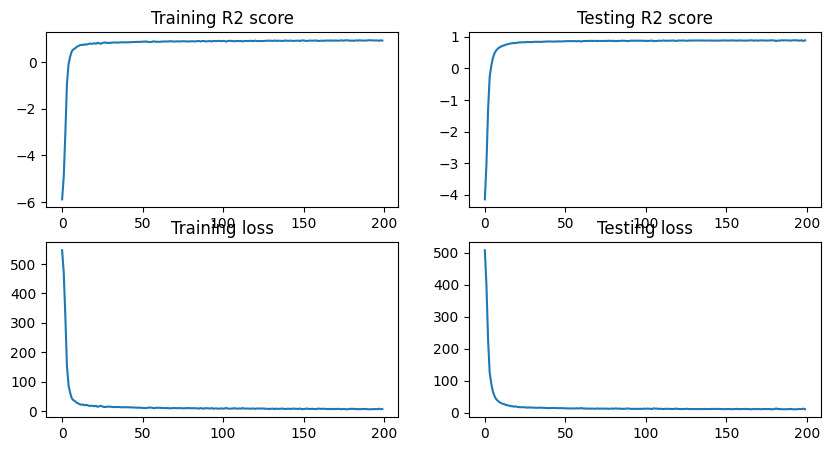

In [ ]:
hist=model.history.history
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['R2Score'])
plt.title("Training R2 score")


plt.subplot(2,2,2)
sns.lineplot(hist['val_R2Score'])
plt.title("Testing R2 score")


plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")


plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")

## CNN

In [ ]:
#CNN
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="Adamw", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9852 - loss: 0.0714


[0.05715443566441536, 0.9872999787330627]

In [ ]:
df=pd.read_csv("/content/winequality-red.csv")

df=df.drop_duplicates()

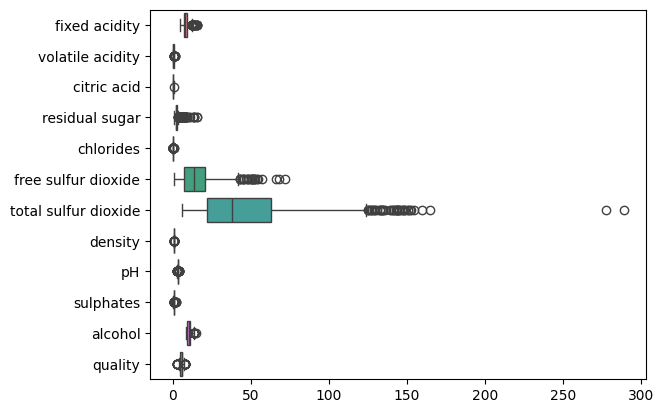

In [ ]:
sns.boxplot(data=df, orient='h')
plt.show()

In [ ]:
X=df.drop('quality', axis=1)
y=df['quality'].map({
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
})

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100, stratify=y)


low = X_train.quantile(0.01)
high = X_train.quantile(0.97)

X_train = X_train.clip(low, high, axis=1)
X_test = X_test.clip(low, high, axis=1)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

temp_df=pd.DataFrame(X_train, columns=X.columns)
input_shape=X_train.shape[1]
print(input_shape)
print(y.shape)

11
(1359,)


In [ ]:
#MNIST CNN

(X_train, y_train), (X_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model=Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,658 (842.41 KB)

 Trainable params: 215,658 (842.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adamw', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - accuracy: 0.7930 - loss: 2.6276 - val_accuracy: 0.9735 - val_loss: 0.0901
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 74ms/step - accuracy: 0.9673 - loss: 0.1114 - val_accuracy: 0.9818 - val_loss: 0.0586
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9779 - loss: 0.0729 - val_accuracy: 0.9824 - val_loss: 0.0552
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9823 - loss: 0.0559 - val_accuracy: 0.9853 - val_loss: 0.0468
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 78ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9872 - val_loss: 0.0411
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9859 - val_loss: 0.0467
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9890 - loss: 0.0325 - val_accuracy: 0.9841 - val_loss: 0.0534
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9912 - loss: 0.0268 -

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9850 - loss: 0.0649


[0.05424964055418968, 0.9869999885559082]

Text(0.5, 1.0, 'Testing loss')

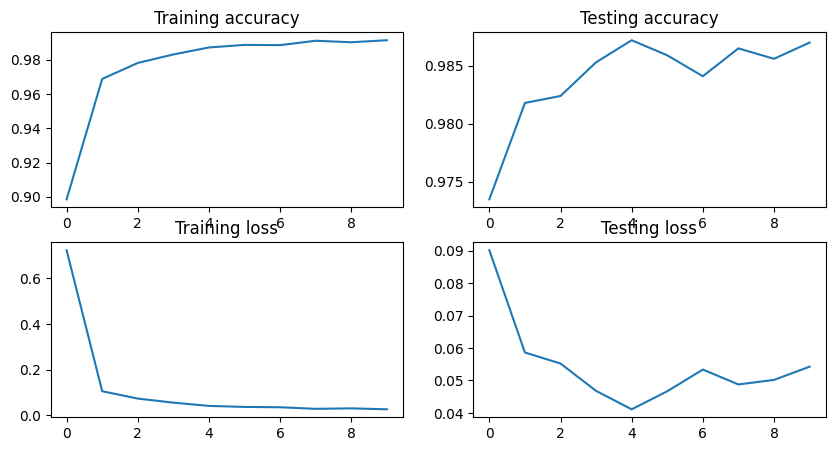

In [ ]:
hist=model.history.history

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['accuracy'])
plt.title("Training accuracy")

plt.subplot(2,2,2)
sns.lineplot(hist['val_accuracy'])
plt.title("Testing accuracy")

plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")

plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")

## Transfer Learning

In [ ]:
#Transfer learning

model = ResNet50(weights='imagenet')

img_path = '/content/catesh.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [('n02123045', 'tabby', np.float32(0.4309214)), ('n02123159', 'tiger_cat', np.float32(0.27440447)), ('n02124075', 'Egyptian_cat', np.float32(0.19219486))]


In [ ]:
base_model=ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import kagglehub

path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'apples-or-tomatoes-image-classification' dataset.
Path to dataset files: /kaggle/input/apples-or-tomatoes-image-classification


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/apples-or-tomatoes-image-classification/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/apples-or-tomatoes-image-classification/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


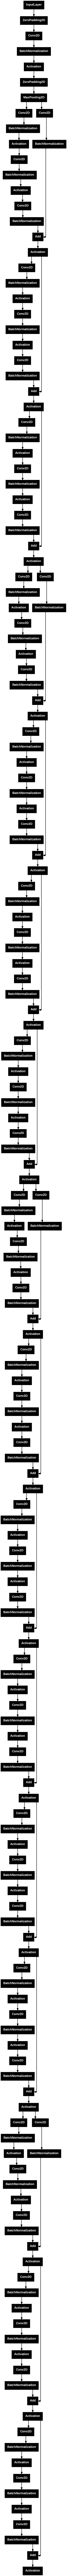

In [ ]:
base_model=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

for layer in base_model.layers:
  layer.trainable=False

plot_model(base_model)

In [ ]:
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6595 - loss: 0.8784 - val_accuracy: 0.6495 - val_loss: 0.8260
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7313 - loss: 0.6290 - val_accuracy: 0.8660 - val_loss: 0.2655
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9348 - loss: 0.1817 - val_accuracy: 0.8454 - val_loss: 0.3380
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9555 - loss: 0.1229 - val_accuracy: 0.9175 - val_loss: 0.1937
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9868 - loss: 0.0613 - val_accuracy: 0.8763 - val_loss: 0.2406
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9892 - loss: 0.0504 - val_accuracy: 0.9072 - val_loss: 0.2307
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9956 - loss: 0.0253 - val_accuracy: 0.9072 - val_loss: 0.2259
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9987 - loss: 0.0182 - val_accuracy: 0.87

In [ ]:
model.evaluate(validation_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9087 - loss: 0.2314 


[0.2303319275379181, 0.907216489315033]

In [ ]:
base_model=ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

for layer in base_model.layers:
  if "conv5" in layer.name:
    layer.trainable=True
  else:
    layer.trainable=False

base_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 14,976,000 (57.13 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [ ]:
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 15,501,058 (59.13 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [ ]:
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6937 - loss: 0.9917 - val_accuracy: 0.5876 - val_loss: 1730.6490
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9368 - loss: 0.2035 - val_accuracy: 0.6907 - val_loss: 186.0583
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.9522 - loss: 0.1818 - val_accuracy: 0.4433 - val_loss: 133.7269
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.9907 - loss: 0.0423 - val_accuracy: 0.7010 - val_loss: 27.8658
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.9907 - loss: 0.0280 - val_accuracy: 0.8660 - val_loss: 7.0841
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9994 - loss: 0.0148 - val_accuracy: 0.9072 - val_loss: 2.2397
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.9933 - loss: 0.0503 - val_accuracy: 0.8763 - val_loss: 4.5261
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9884 - loss: 0.0647 - val_accura

## RNN

In [ ]:
#RNN

lemm = WordNetLemmatizer()

In [ ]:
df=pd.read_csv("/content/Clothing-Review.csv")

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
def filter_score(rating):
    return int(rating > 3)

select_cols=["Class Name", "Title", "Review Text"]

X=df[select_cols]
y=df['Rating']
y=y.apply(filter_score)

In [ ]:
def toLower(data):
    if isinstance(data, float):
        return '<UNK>'
    else:
        return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

X["Title"] = X["Title"].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)

X["Title"] = X["Title"].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)

X["Title"] = X["Title"].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))

X["Title"] = X["Title"].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = X["Title"]+''+X['Review Text']+''+X['Class Name']

X['Text'].head()

/tmp/ipython-input-3775220343.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Title"] = X["Title"].apply(toLower)
/tmp/ipython-input-3775220343.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Review Text'] = X['Review Text'].apply(toLower)
/tmp/ipython-input-3775220343.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Text
2,major design flawshigh hopes dress really want...
3,favorite buy love love love jumpsuit fun f...
4,flattering shirtshirt flattering due adjustabl...
5,petitelove tracy reese dresses one petite 5 ...
6,cagrcoal shimmer funaded basket hte last mintu...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['Text'], y, test_size=0.25, random_state=100)

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

train_pad = pad_sequences(train_seq,
                          maxlen=40,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(test_seq,
                         maxlen=40,
                         truncating="post",
                         padding="post")

In [111]:
model=Sequential([
    Embedding(10000, 128, input_length=40),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, 40))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 40, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,057 (4.99 MB)

 Trainable params: 1,309,057 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_pad, y_train, batch_size=32, epochs=10, validation_data=(test_pad, y_test))

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7676 - loss: 0.5199 - val_accuracy: 0.7689 - val_loss: 0.4804
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7707 - loss: 0.4504 - val_accuracy: 0.7687 - val_loss: 0.4744
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7654 - loss: 0.4636 - val_accuracy: 0.7830 - val_loss: 0.4574
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8178 - loss: 0.4154 - val_accuracy: 0.7974 - val_loss: 0.4431
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8573 - loss: 0.3608 - val_accuracy: 0.7978 - val_loss: 0.4541
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8645 - loss: 0.3404 - val_accuracy: 0.7886 - val_loss: 0.4748
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8825 - loss: 0.3035 - val_accuracy: 0.7968 - val_loss: 0.4696
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8915 - loss: 0.2870 - 

In [112]:
df= pd.read_csv("TSLA.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

scaler=MinMaxScaler()

df1=scaler.fit_transform(df)
df1=pd.DataFrame(df1, columns=df.columns)
df1.drop('Adj Close', axis=1, inplace=True)

df2=df1.copy()
df2.drop('Close', axis=1, inplace=True)


df3=df1['Close']
df2.head()


,Open,High,Low,Volume
0,0.001439,0.001498,0.000871,0.133184
1,0.001114,0.001043,0.000614,0.082560
2,0.000627,0.000543,0.000140,0.110956
3,0.000042,0.000000,0.000000,0.111857
4,0.000000,0.000144,0.000097,0.124842


In [113]:
time_frame=60 #days
X=[]
y=[]
for i in range(len(df) - time_frame):
    X.append(df2.iloc[i : i + time_frame].values)   # 60 rows as input
    y.append(df3.iloc[i + time_frame])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=False)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [114]:
model=Sequential([
    SimpleRNN(64),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(optimizer='adamw', loss='mse', metrics=['R2Score'])
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - R2Score: -7.6394 - loss: 0.0028 - val_R2Score: 0.9272 - val_loss: 0.0058
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - R2Score: 0.7731 - loss: 7.7177e-05 - val_R2Score: 0.9028 - val_loss: 0.0078
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - R2Score: 0.9138 - loss: 3.0009e-05 - val_R2Score: 0.8757 - val_loss: 0.0100
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - R2Score: 0.9648 - loss: 1.1833e-05 - val_R2Score: 0.8928 - val_loss: 0.0086
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - R2Score: 0.9539 - loss: 1.5317e-05 - val_R2Score: 0.9098 - val_loss: 0.0072
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - R2Score: 0.9616 - loss: 1.2961e-05 - val_R2Score: 0.9158 - val_loss: 0.0068
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - R2Score: 0.9604 - loss: 1.3509e-05 - val_R2Score: 0.9105 - val_loss: 0.0072
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - R2Score: 0.9660 - loss: 1.1455e-05 - val_R2Scor

In [116]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - R2Score: 0.8745 - loss: 4.2306e-04


[0.0012834554072469473, 0.9839973449707031]

Text(0.5, 1.0, 'Testing loss')

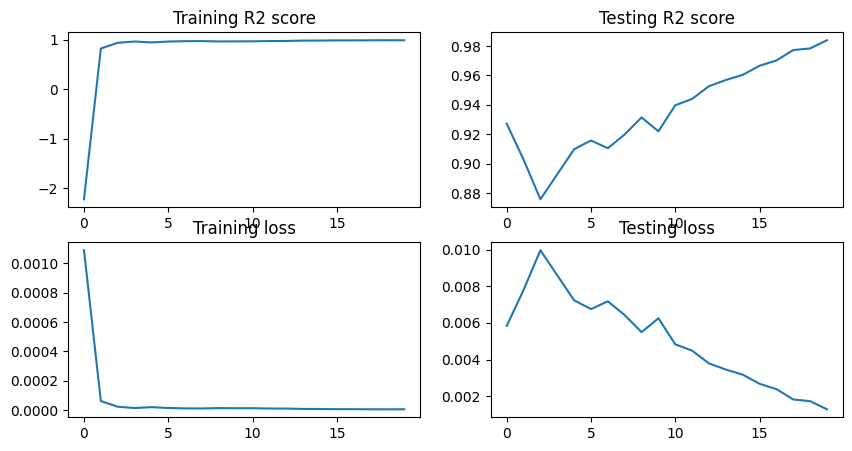

In [117]:
hist=model.history.history
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['R2Score'])
plt.title("Training R2 score")


plt.subplot(2,2,2)
sns.lineplot(hist['val_R2Score'])
plt.title("Testing R2 score")


plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")


plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")

## LSTM

In [10]:
# LSTM

max_features=10000
max_len=60
embedding_size=128

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features, seed=100)
print(X_train[0])
print(X_test.shape)
print(y_train.shape)
train_pad = pad_sequences(X_train,
                          maxlen=max_len,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(X_test,
                         maxlen=max_len,
                         truncating="post",
                         padding="post")

[1, 132, 8, 132, 497, 254, 8, 30, 6, 52, 20, 12, 47, 94, 483, 33, 4, 208, 273, 12, 2, 8, 30, 1711, 5, 12, 47, 6, 749, 15, 57, 824, 1462, 80, 1144, 21, 50, 1838, 82, 49, 7, 4, 712, 7, 14, 431, 12, 2, 38, 254, 8, 30, 52, 5, 8, 79, 94, 749, 638, 15, 518, 4, 529, 215, 235, 2, 38, 12, 9, 64, 3927, 15, 4, 1218, 63, 26, 343, 34, 14, 431, 26, 4274, 132, 8, 132, 152, 387, 4, 529, 1197, 51, 29, 1291, 9, 208, 21, 9, 2, 94, 749, 11, 27, 419, 2315, 2, 2, 14, 11, 27, 217, 29, 127, 27, 118, 8, 168, 1947, 2070, 1681, 5, 32, 4, 85, 1438, 25, 70, 2623, 19, 4, 686, 31, 2752, 2827, 27, 2, 47, 8, 1464, 763, 15, 4, 20, 9, 5585, 5, 1978, 94, 2125, 949, 4, 130, 25, 62, 30, 714, 1638, 8, 4, 1174, 15, 132, 8, 132, 9, 24, 290, 149, 21, 50, 26, 195, 757, 8, 4478, 12, 12, 9, 441, 47, 49, 1984, 139, 5, 4, 123, 3247, 2, 1091, 2102, 7, 265, 25, 144, 24, 1661, 12, 8, 2, 4890, 40, 4, 4491, 132, 628, 2219, 21, 490, 30, 1200, 4, 1716, 4095, 12, 497, 8, 4003, 129, 483, 60, 48, 129, 1224, 1291, 15, 12, 9, 99, 578, 5, 2880,

In [11]:
model=Sequential([
    Embedding(max_features, embedding_size, input_length=max_len),
    LSTM(64, return_sequences=True), #Stacked
    LSTM(128),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_pad, y_train, batch_size=64, epochs=20, validation_data=(test_pad, y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5656 - loss: 0.6623 - val_accuracy: 0.7586 - val_loss: 0.4924
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8119 - loss: 0.4137 - val_accuracy: 0.7721 - val_loss: 0.4776
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8574 - loss: 0.3358 - val_accuracy: 0.7628 - val_loss: 0.5203
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8845 - loss: 0.2919 - val_accuracy: 0.7592 - val_loss: 0.5359
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9001 - loss: 0.2634 - val_accuracy: 0.7504 - val_loss: 0.6090
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9065 - loss: 0.2413 - val_accuracy: 0.7517 - val_loss: 0.6022
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9203 - loss: 0.2180 - val_accuracy: 0.7464 - val_loss: 0.6313
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9272 - loss: 0.2115 - val_accu

In [5]:
model.evaluate(test_pad, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7318 - loss: 1.4084


[1.4161458015441895, 0.7271199822425842]

In [36]:
#Text Generation using LSTM

text = """Shall I compare thee to a summer's day? Thou art more lovely and more temperate.
        Rough winds do shake the darling buds of May, And summer's lease hath all too short a date"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
tokenizer.word_index

{'a': 1,
 "summer's": 2,
 'more': 3,
 'and': 4,
 'shall': 5,
 'i': 6,
 'compare': 7,
 'thee': 8,
 'to': 9,
 'day': 10,
 'thou': 11,
 'art': 12,
 'lovely': 13,
 'temperate': 14,
 'rough': 15,
 'winds': 16,
 'do': 17,
 'shake': 18,
 'the': 19,
 'darling': 20,
 'buds': 21,
 'of': 22,
 'may': 23,
 'lease': 24,
 'hath': 25,
 'all': 26,
 'too': 27,
 'short': 28,
 'date': 29}

In [37]:
input_sequences = []
for line in text.split('.'):
   token_list = tokenizer.texts_to_sequences([line])[0]
  #  print(token_list)
   for i in range(1, len(token_list)):
       n_gram_sequence = token_list[:i+1]
       input_sequences.append(n_gram_sequence)
      #  print(n_gram_sequence)

# input_sequences

In [46]:
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

18


In [39]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y

array([ 6,  7,  8,  9,  1,  2, 10, 11, 12,  3, 13,  4,  3, 14, 16, 17, 18,
       19, 20, 21, 22, 23,  4,  2, 24, 25, 26, 27, 28,  1, 29],
      dtype=int32)

In [42]:
model=Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len-1),
    LSTM(128),
    Dense(total_words, activation='softmax')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0323 - loss: 3.4029
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.0968 - loss: 3.3969
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.1613 - loss: 3.3909
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.1613 - loss: 3.3846
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.1290 - loss: 3.3777
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1935 - loss: 3.3699
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.1935 - loss: 3.3608
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1613 - loss: 3.3500
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.1613 - loss: 3.3366
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.1290 - loss: 3.3199
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.1290 - loss: 3.2987
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.

In [47]:
model.evaluate(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - accuracy: 1.0000 - loss: 0.5730


[0.5729510188102722, 1.0]

Text(0.5, 1.0, 'Training loss')

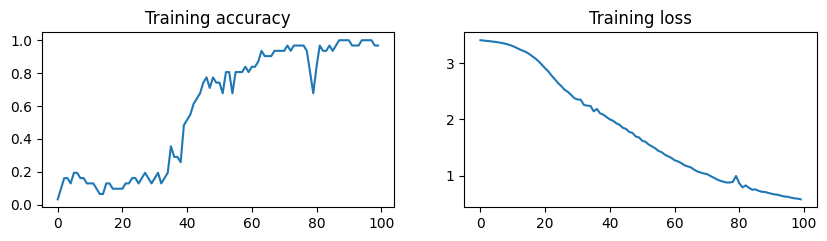

In [45]:
history=model.history.history

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(history['accuracy'])
plt.title("Training accuracy")

plt.subplot(2,2,2)
sns.lineplot(history['loss'])
plt.title("Training loss")

In [48]:
def generate_text(seed_text, next_words, max_sequence_len):
   for _ in range(next_words):
       token_list = tokenizer.texts_to_sequences([seed_text])[0]
       token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
       predicted = np.argmax(model.predict(token_list), axis=-1)
       output_word = ""
       for word, index in tokenizer.word_index.items():
           if index == predicted:
               output_word = word
               break
       seed_text += " " + output_word
   return seed_text

In [50]:
generate_text("Shall I", 10, max_sequence_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


"Shall I compare thee to a summer's day thou art more lovely"

## Bidirectional LSTM

In [133]:
df= pd.read_csv("TSLA.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

scaler=MinMaxScaler()

df1=scaler.fit_transform(df)
df1=pd.DataFrame(df1, columns=df.columns)
df1.drop('Adj Close', axis=1, inplace=True)

df2=df1.copy()
df2.drop('Close', axis=1, inplace=True)


df3=df1['Close']
df2.head()



,Open,High,Low,Volume
0,0.001439,0.001498,0.000871,0.133184
1,0.001114,0.001043,0.000614,0.082560
2,0.000627,0.000543,0.000140,0.110956
3,0.000042,0.000000,0.000000,0.111857
4,0.000000,0.000144,0.000097,0.124842


In [134]:
time_frame=60 #days
X=[]
y=[]
for i in range(len(df) - time_frame):
    X.append(df2.iloc[i : i + time_frame].values)   # 60 rows as input
    y.append(df3.iloc[i + time_frame])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=False)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [135]:
model=Sequential([
    Bidirectional(LSTM(64), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='linear')
])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_7 (Bidirectional) │ (None, 128)            │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,457 (138.50 KB)

 Trainable params: 35,457 (138.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.compile(optimizer='adamw', loss='mse', metrics=['R2Score'])
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - R2Score: 0.6657 - loss: 1.1344e-04 - val_R2Score: 0.8679 - val_loss: 0.0106
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - R2Score: 0.9740 - loss: 8.7225e-06 - val_R2Score: 0.9004 - val_loss: 0.0080
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - R2Score: 0.9847 - loss: 5.2039e-06 - val_R2Score: 0.9168 - val_loss: 0.0067
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - R2Score: 0.9819 - loss: 6.1603e-06 - val_R2Score: 0.9331 - val_loss: 0.0054
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - R2Score: 0.9892 - loss: 3.7474e-06 - val_R2Score: 0.9468 - val_loss: 0.0043
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - R2Score: 0.9898 - loss: 3.4106e-06 - val_R2Score: 0.9523 - val_loss: 0.0038
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - R2Score: 0.9879 - loss: 4.0993e-06 - val_R2Score: 0.9521 - val_loss: 0.0038
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - R2Score: 0.9895 - loss: 3.4168e-06 - val_R

In [122]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - R2Score: 0.9247 - loss: 5.5034e-04


[0.0015555999707430601, 0.9806041121482849]

Text(0.5, 1.0, 'Testing loss')

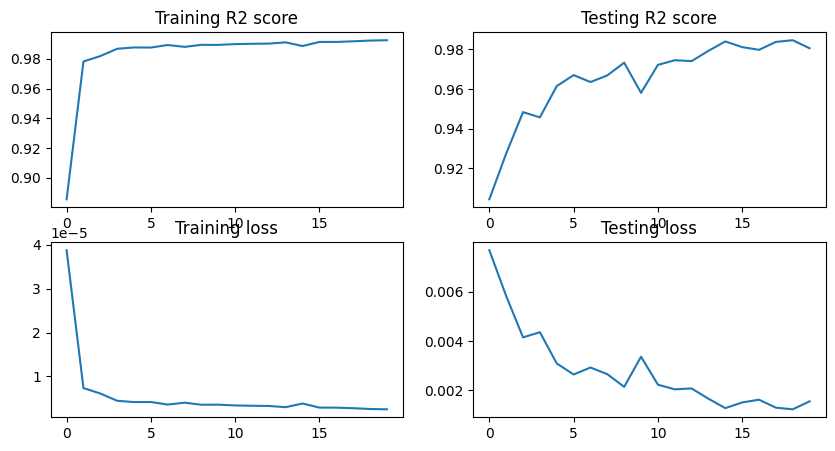

In [123]:
hist=model.history.history
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['R2Score'])
plt.title("Training R2 score")


plt.subplot(2,2,2)
sns.lineplot(hist['val_R2Score'])
plt.title("Testing R2 score")


plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")


plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")

## GRU

In [163]:
df= pd.read_csv("TSLA.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

scaler=MinMaxScaler()

df1=scaler.fit_transform(df)
df1=pd.DataFrame(df1, columns=df.columns)
df1.drop('Adj Close', axis=1, inplace=True)

df2=df1.copy()
df2.drop('Close', axis=1, inplace=True)


df3=df1['Close']
df2.head()

,Open,High,Low,Volume
0,0.001439,0.001498,0.000871,0.133184
1,0.001114,0.001043,0.000614,0.082560
2,0.000627,0.000543,0.000140,0.110956
3,0.000042,0.000000,0.000000,0.111857
4,0.000000,0.000144,0.000097,0.124842


In [164]:
time_frame=60 #days
X=[]
y=[]
for i in range(len(df) - time_frame):
    X.append(df2.iloc[i : i + time_frame].values)   # 60 rows as input
    y.append(df3.iloc[i + time_frame])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=False)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [165]:
model=Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='linear')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 64)             │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,505 (52.75 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to watch
    patience=3,          # Stop if no improvement for 3 epochs
    mode='min',          # Stop when loss stops decreasing
    restore_best_weights=True # Restore weights from best epoch
)

In [167]:
model.compile(optimizer='adamw', loss='mse', metrics=['R2Score'])
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - R2Score: -0.4265 - loss: 4.8016e-04 - val_R2Score: 0.9875 - val_loss: 9.9901e-04
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - R2Score: 0.9910 - loss: 3.0582e-06 - val_R2Score: 0.9854 - val_loss: 0.0012
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - R2Score: 0.9914 - loss: 2.8212e-06 - val_R2Score: 0.9855 - val_loss: 0.0012
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - R2Score: 0.9924 - loss: 2.5239e-06 - val_R2Score: 0.9847 - val_loss: 0.0012


In [168]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - R2Score: 0.8886 - loss: 3.6412e-04


[0.000999010051600635, 0.9875438809394836]

Text(0.5, 1.0, 'Testing loss')

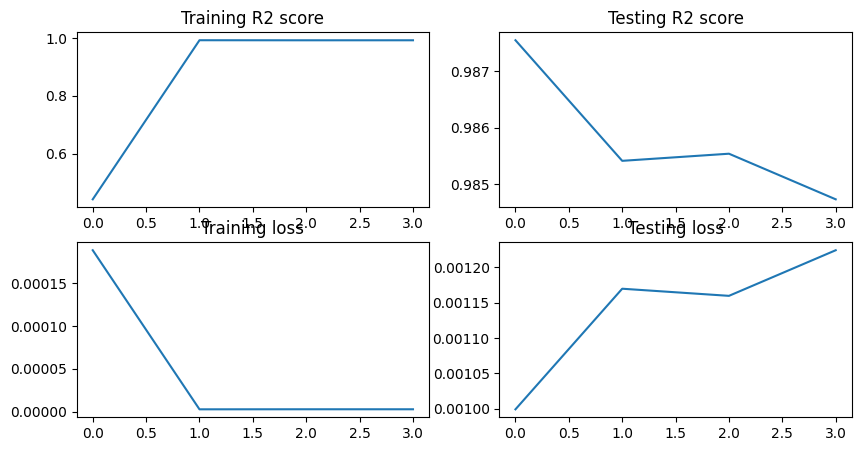

In [169]:
hist=model.history.history
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.lineplot(hist['R2Score'])
plt.title("Training R2 score")

plt.subplot(2,2,2)
sns.lineplot(hist['val_R2Score'])
plt.title("Testing R2 score")

plt.subplot(2,2,3)
sns.lineplot(hist['loss'])
plt.title("Training loss")

plt.subplot(2,2,4)
sns.lineplot(hist['val_loss'])
plt.title("Testing loss")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


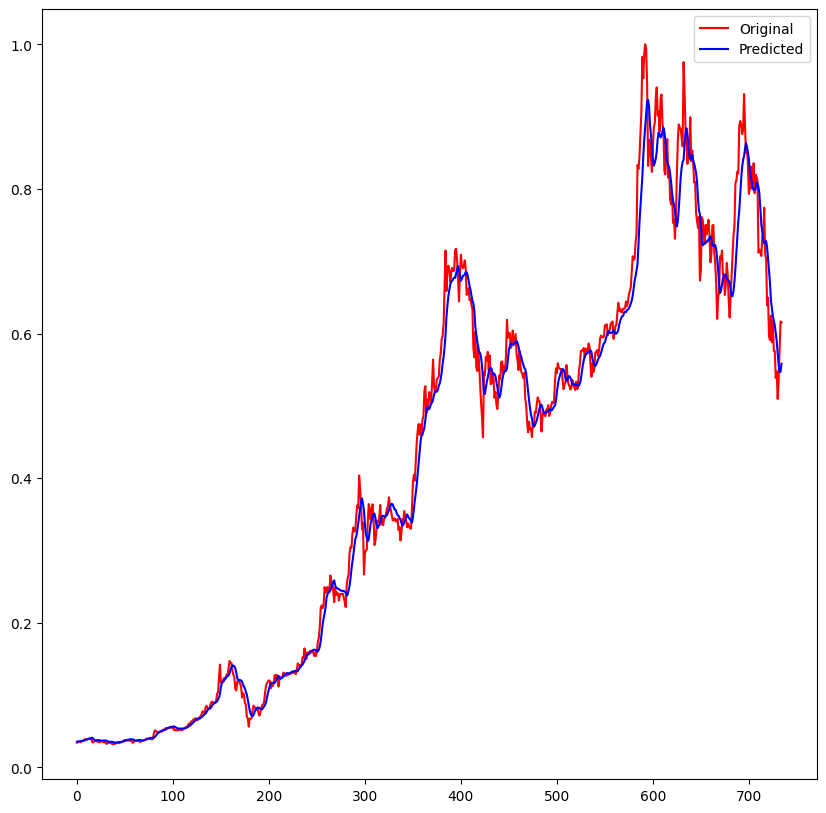

In [178]:
# Original value vs Predicted value plot

plt.figure(figsize=(10,10))
plt.plot(y_test, label='Original', c='red')
plt.plot(model.predict(X_test), label='Predicted', c='blue')
plt.legend()
plt.show()